# Diamond Data EDA
>### Author: Lu (Christina) Jin

# 1. Import all libraries

In [ ]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = (24, 8)

# 2. Introducing the diamonds analyzation data




> ## 2.1 Acquiring Data


In [ ]:
df = pd.read_csv("https://resources.oreilly.com/binderhub/techniques-for-data-science-with-big-datasets/raw/master/data/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


> ## 2.2 Basic Data Cleaning
Light manipulation include the following steps:
*   Drop unrelated index column
*   Remove any N/A datapoints







In [ ]:
# Dropping the index column
df = df.drop(columns="Unnamed: 0", inplace=False)
df.dropna
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


> ## 2.3 Data Interpretation

In [ ]:
list(df)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
df.describe()
#.round(decimals=2)

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
print("Diamond Cuts:", df.cut.unique())
print("Diamond Colors: ", df.color.unique())
print("Diamond Clarities: ", df.clarity.unique())

Diamond Cuts: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Diamond Colors:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Diamond Clarities:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


> ### Dataset Information:

**This set of data contains information of 53,940 piece of diamonds, including 3 qualitative variables (cuts, colors, clarity), and 7 quantitative variables (prices, carats, x, y, z, depth and table sizes). This dataset could be used to analyze and further predict prices for diamonds.**


### Variables Interpretation:

* Carat: Weight of the diamond (0.2~5.01)
* Cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* Color: Diamond color(J (worst), I, H, G, F, E, D (best))
* Clarity: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* Depth: The height of a diamond divided by average diameter of the diamond (43~79)
* Table: Width of top flat facet of diamond (table) expressed as a percentage of its average diameter (widest point) (43~95)
* Price: Price in US dollars (\$326--\$18,823)
* X: Length in mm (0~10.74)
* Y: Width in mm (0~58.9)
* Z: Depth in mm (0~31.8)





# 3. Dataset General Stats Review & Further Data Processing


> ## 3.1 Explore Quantitative Variables
Observations:
*   Almost all of the diamonds are no heavier than 3 carats. And most of them are less than 2 carats.
*   There are entries of diamonds with 0 in x, y, z dimensions.
*   There are entries seem unbelievebly  large in size with 58.9mm in y and 31.8mm in z.
*   The median price for a diamond, \$2401, is a lot lower than the mean price, \$3932. This implies there is a positive skew in diamond pricing.
*   the median value of x,y,z are quite similar with the means, which indicates that most diamonds are pretty similar in size, which creates a normal distribution.




Text(0.5, 1.0, 'Distribution of Carat')

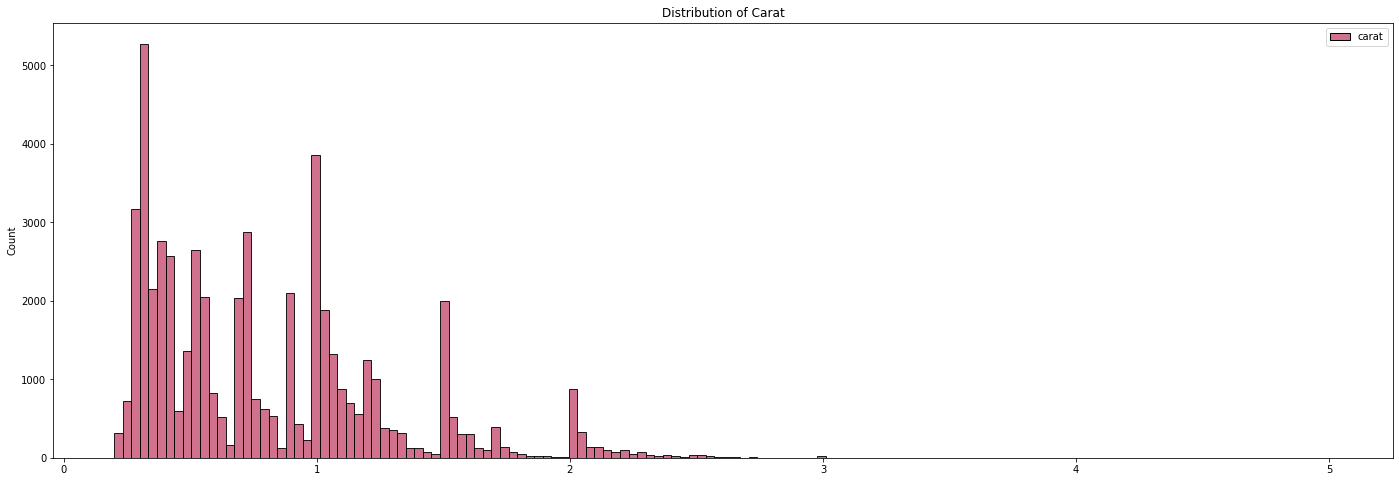

In [ ]:
diamond_carat = (df[["carat"]])
sns.histplot(data=diamond_carat, palette="flare").set_title(
    'Distribution of Carat')

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**The following step excludes data points that appear to have 0 in "x", "y", or "z" dimensions**

In [ ]:
df_clean = df.drop(df[df["x"]==0].index, inplace=False)
df_clean = df.drop(df[df["y"]==0].index, inplace=False)
df_clean = df.drop(df[df["z"]==0].index, inplace=False)
df_clean.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> ## 3.2 Further Data Processing
Take a closer look at the dataset. Explore whether there are any datapoints are seems quite off by plotting out pairplots, and eliminate those outliers to obtain even cleaner dataset.

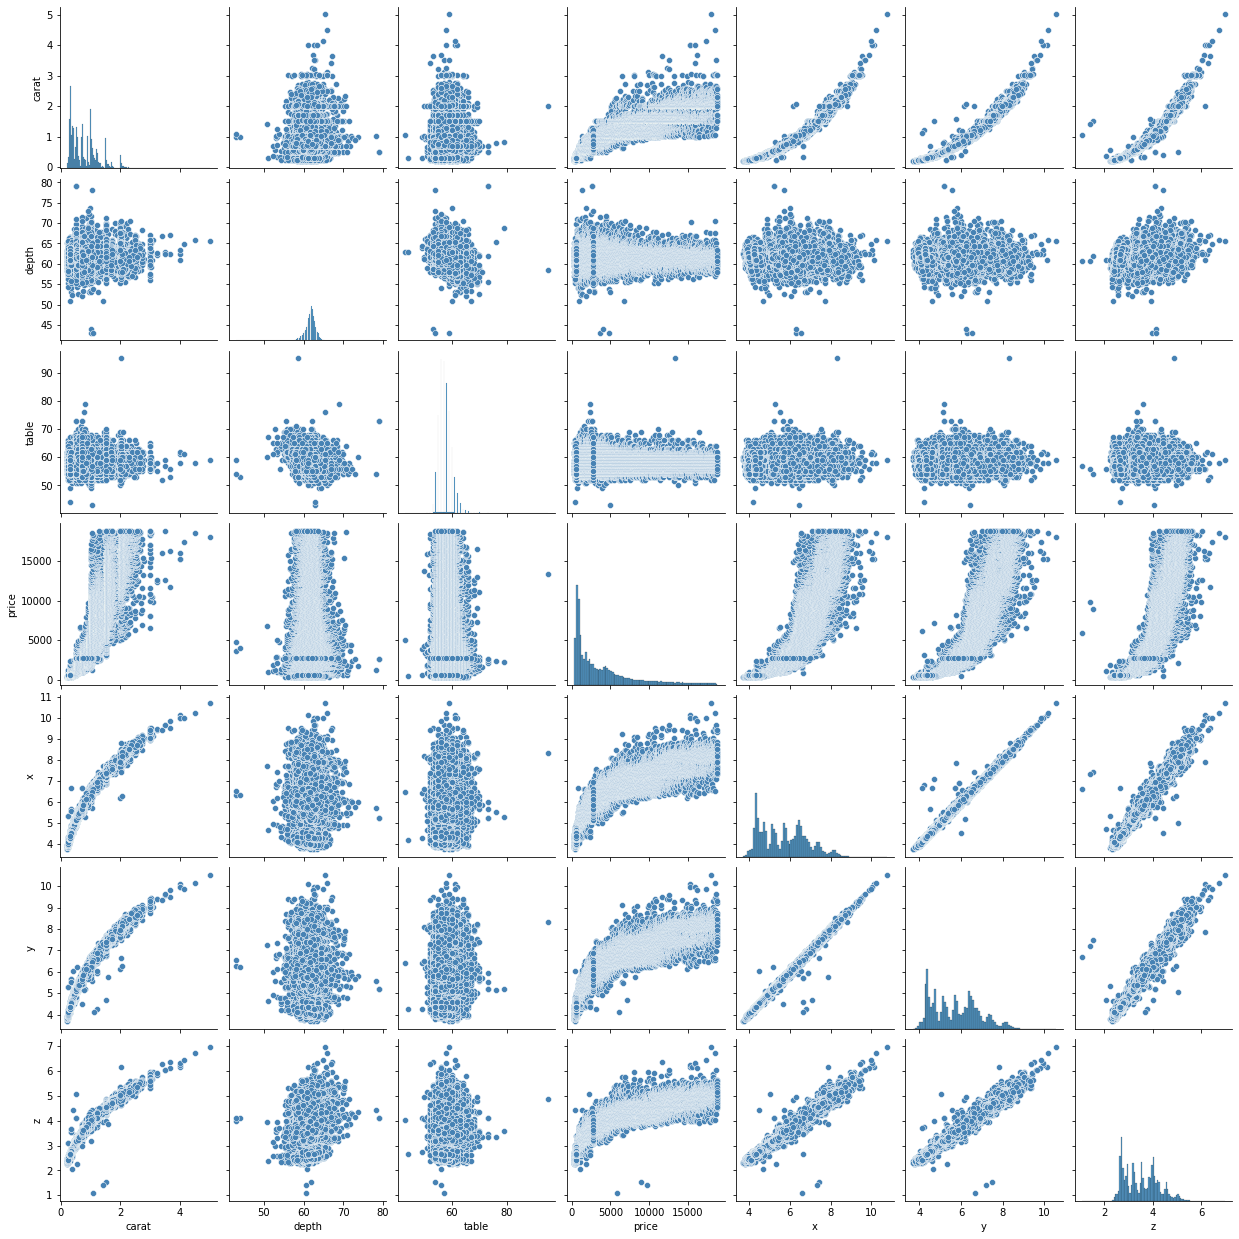

In [ ]:
#sns.pairplot(df, plot_kws=(dict(edgecolor = "none")))
sns.pairplot(df_clean, plot_kws={"color": "steelblue"})


**From the plots above, we can spot some obvious outliers in "y" and "z" that could be removed.**

In [ ]:
df_clean = df_clean.drop(df_clean[df_clean["y"]>20].index)
df_clean = df_clean.drop(df_clean[df_clean["z"]>15].index)
df_clean[["x","y","z"]].describe().round(decimals=2)


,x,y,z
count,53917.00,53917.00,53917.00
mean,5.73,5.73,3.54
std,1.12,1.11,0.69
min,3.73,3.68,1.07
25%,4.71,4.72,2.91
50%,5.70,5.71,3.53
75%,6.54,6.54,4.04
max,10.74,10.54,6.98


**Next we are taking a look see if there are any not-so-obvious outliers that we missed from other quantitative variables.**

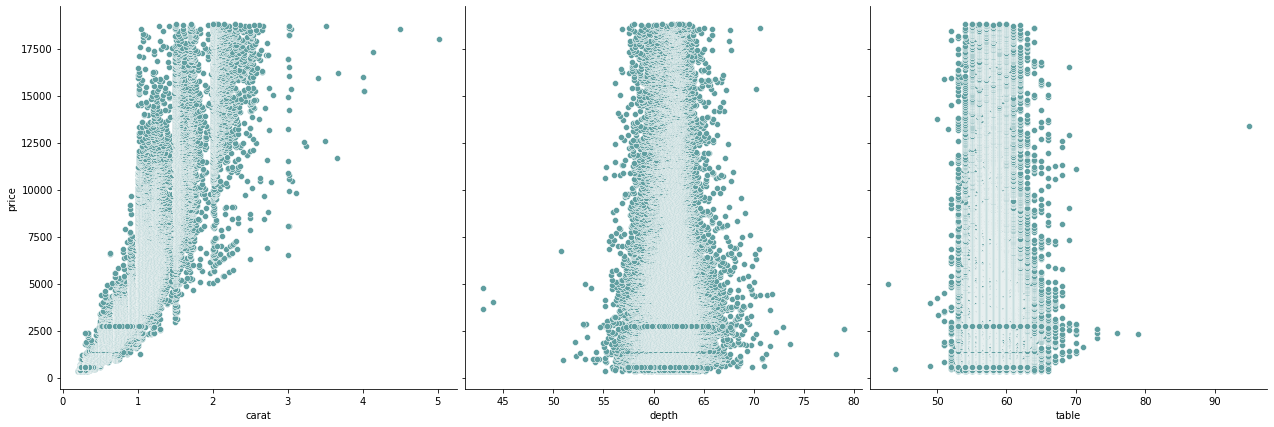

In [ ]:
sns.pairplot(df_clean, x_vars=['carat','depth','table'], y_vars=['price'], 
             plot_kws={"color": "cadetblue"}, height=6)

**There are some more outliers from "depth" and "table" variables need to be eliminated.Then, create a dataframe which has all the outliers removed**

In [ ]:
diamond_df = df_clean[(df_clean["depth"]<75)&(df_clean["depth"]>50)&
                      (df_clean["table"]<80)&(df_clean["table"]>25)]
diamond_df[["depth","table"]].describe().round(decimals=2)

,depth,table
count,53910.00,53910.00
mean,61.75,57.46
std,1.42,2.23
min,50.80,43.00
25%,61.00,56.00
50%,61.80,57.00
75%,62.50,59.00
max,73.60,79.00


# 4. Basic Data Analysis


> ## 4.1 Explore Qualitative Variables
**Observations:**
*   More than half of the diamonds fall in the premium and ideal category. Which is pretty suprising, since assumingly there will be more dimonds that are ranked between fair, good and very good.
*   Diamonds are pretty evenly spread out between all 6 colors out of 7.
*   None of the cut, color, or clarity seem to be the major factors when determine the price.


In [ ]:
diamond_cut=diamond_df[['cut']]
print("Percentage of Each Quality of Cut: \n")
diamond_cut['cut'].value_counts(normalize=True).round(decimals=2)*100

Percentage of Each Quality of Cut: 



Ideal        40.0
Premium      26.0
Very Good    22.0
Good          9.0
Fair          3.0
Name: cut, dtype: float64

Text(0.5, 1.0, 'Distribution of Price Based on Diamond Cut')

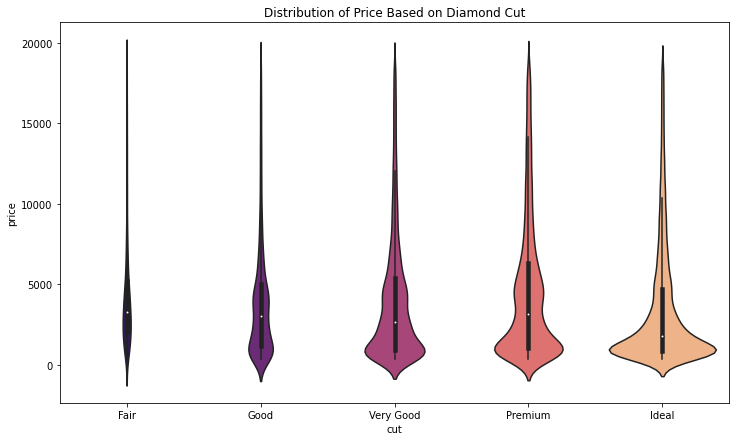

In [ ]:
plt.figure(figsize=(12,7))
sns.violinplot(data=diamond_df, x='cut',y='price', 
               order=['Fair', 'Good','Very Good', 'Premium','Ideal'],
               palette="magma", scale="count").set_title(
                   'Distribution of Price Based on Diamond Cut')

In [ ]:
diamond_color=diamond_df[['color']]
print("Percentage of Each Color: \n")
diamond_color['color'].value_counts(normalize=True).sort_index(ascending=False).round(decimals=2)*100

Percentage of Each Color: 



J     5.0
I    10.0
H    15.0
G    21.0
F    18.0
E    18.0
D    13.0
Name: color, dtype: float64

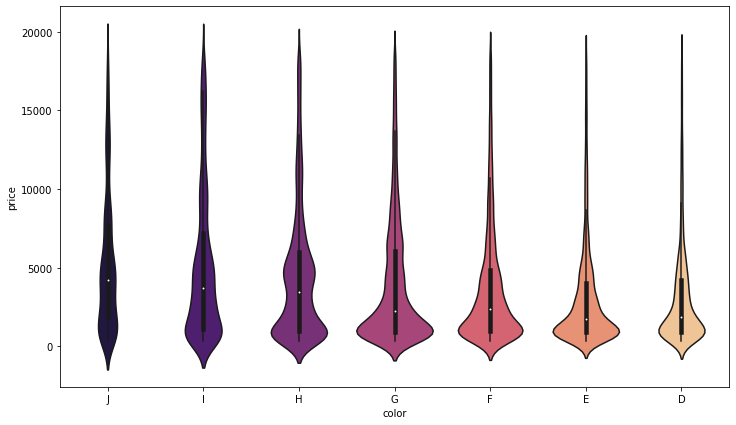

In [ ]:
plt.figure(figsize=(12,7))
sns.violinplot(data=diamond_df, x='color',order='JIHGFED',y='price', palette="magma",scale= "count")

In [ ]:
diamond_clarity=diamond_df[['clarity']]
print("Percentage of Each Level of Clarity: \n")
diamond_clarity['clarity'].value_counts(normalize=True).round(decimals=2)*100

Percentage of Each Level of Clarity: 



SI1     24.0
VS2     23.0
SI2     17.0
VS1     15.0
VVS2     9.0
VVS1     7.0
IF       3.0
I1       1.0
Name: clarity, dtype: float64

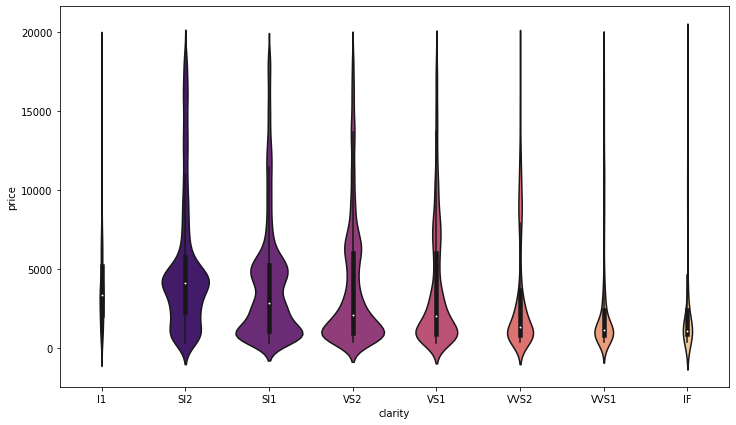

In [ ]:
plt.figure(figsize=(12,7))
sns.violinplot(data=diamond_df, x='clarity',y='price', 
               order=['I1','SI2','SI1', 'VS2','VS1', 'VVS2','VVS1', 'IF'],
               palette="magma",scale= "count")

Text(0.5, 1.0, 'Distribution of Carat Weight in Each Diamond Cuts')

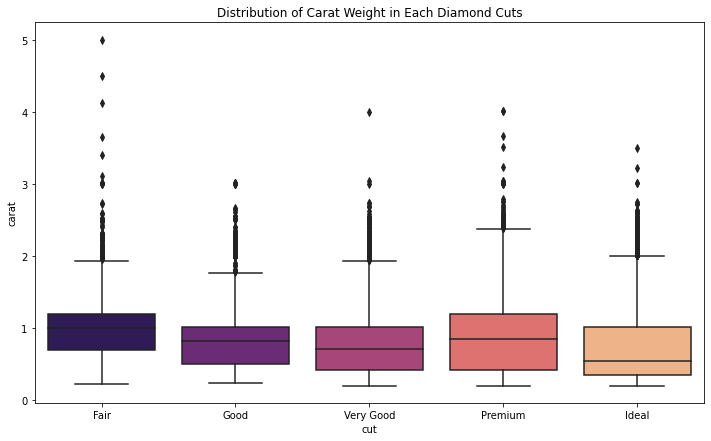

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=diamond_df, x='cut', y='carat',
            order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
            palette="magma").set_title('Distribution of Carat Weight in Each Diamond Cuts')

> ## 4.2 Explore relationship between each variables
**Observations:**
*   Carat and price is highly correlated, but not 100%
*   Other multivariate such as x, y, and z dimensions also impact the price similarly.
*   Depth and table size doesn't have much impact on the price.
*   x, y, and z are highly linearly correlated, especially x and y. --- not surprising.

**Plot another pairplot with processed data, and color code by quality of cut.**

In [ ]:
# Plot pairplots with processed data
# and color coded by diamond cut
colpa_5 = sns.color_palette("rocket_r", n_colors=5)
sns.pairplot(diamond_df, hue="cut", hue_order=['Fair','Good','Very Good','Premium','Ideal'],
             height=5, plot_kws=(dict(edgecolor="none")), palette=colpa_5)

Output hidden; open in https://colab.research.google.com to view.

**To further analyzing the correlation between price and 3 multivariates - carat, depth and table. Regression lines are added in the scatter plots to assist interpretion.**

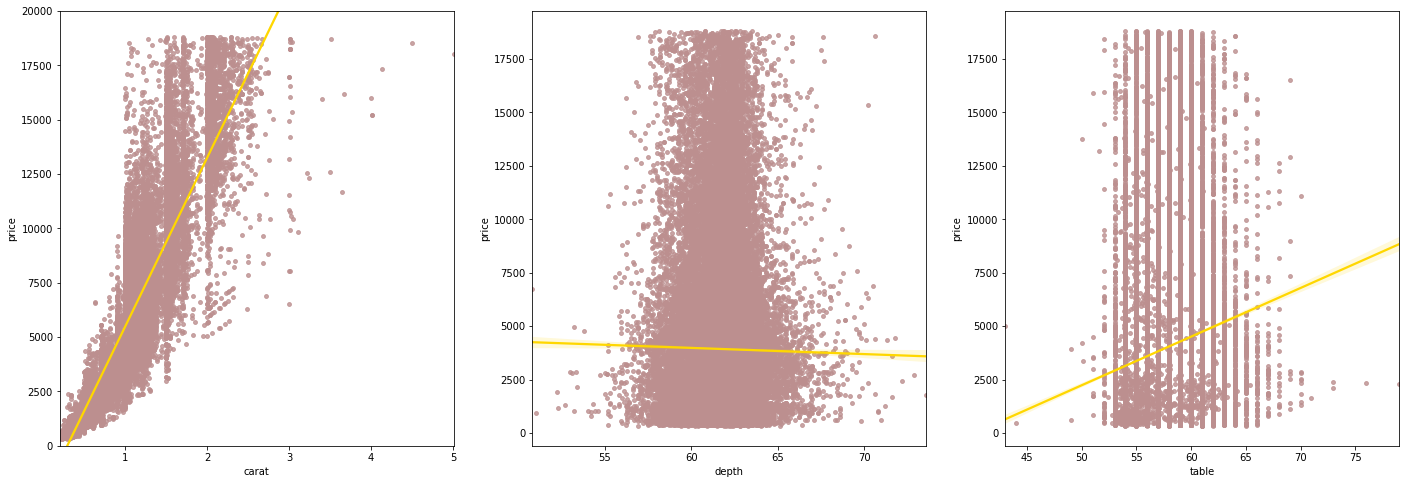

In [ ]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(24,8)
sns.regplot(x='carat', y='price', data=diamond_df, 
            scatter_kws={"color":"rosybrown","s":15}, 
            line_kws={"color":"gold"}, ax=axs[0]).set(ylim=(0, 20000))
sns.regplot(x='depth', y='price', data=diamond_df, 
            scatter_kws={"color":"rosybrown","s":15}, 
            line_kws={"color":"gold"}, ax=axs[1])
sns.regplot(x='table',y='price', data=diamond_df, 
            scatter_kws={"color":"rosybrown","s":15}, 
            line_kws={"color":"gold"}, ax=axs[2])

**As the regression plot shows, depth and table does not seem to have any sort of direct relationship with prices.** 

**Also, most of the diamonds fall between the range 50-70 in both depth and table sizes.**

# 5. Exploratory Data Analysis

> ## 5.1 Analyze price distributions based on categorical variables.
**Price distributions are being analyzed based on the following three categories:**
*   Cut: Fair, Good, Very Good, Premium, Ideal
*   Color: J, I, H, G, F, E, D
*   Clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

**To explore whether different cut makes a slight difference in pricing.**

**The graph below dose show the better the cut is the steeper the correlation is with the price.**


<Figure size 1728x1728 with 0 Axes>

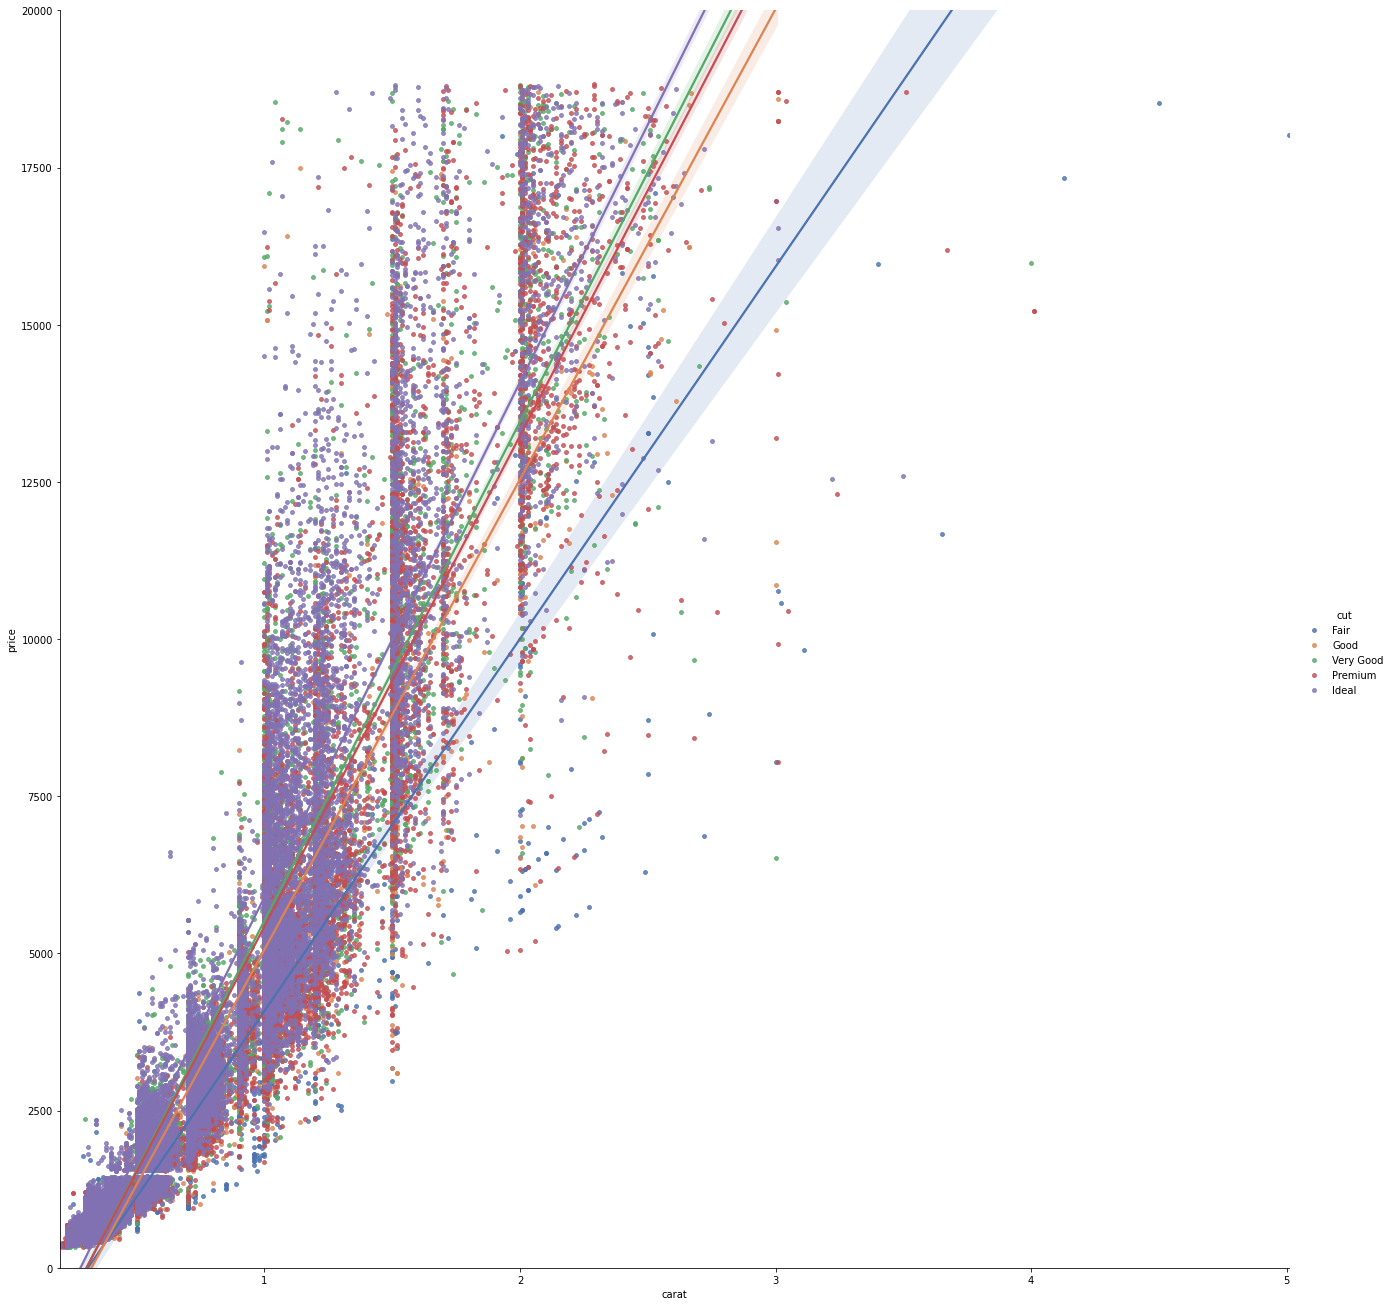

In [ ]:
plt.figure(figsize=(24,24))
sns.lmplot(x="carat", y="price", hue="cut", data=diamond_df, 
           hue_order=['Fair', 'Good','Very Good', 'Premium','Ideal'], 
           palette="deep", height=18, scatter_kws={"s":15}).set(ylim=(0,20000))

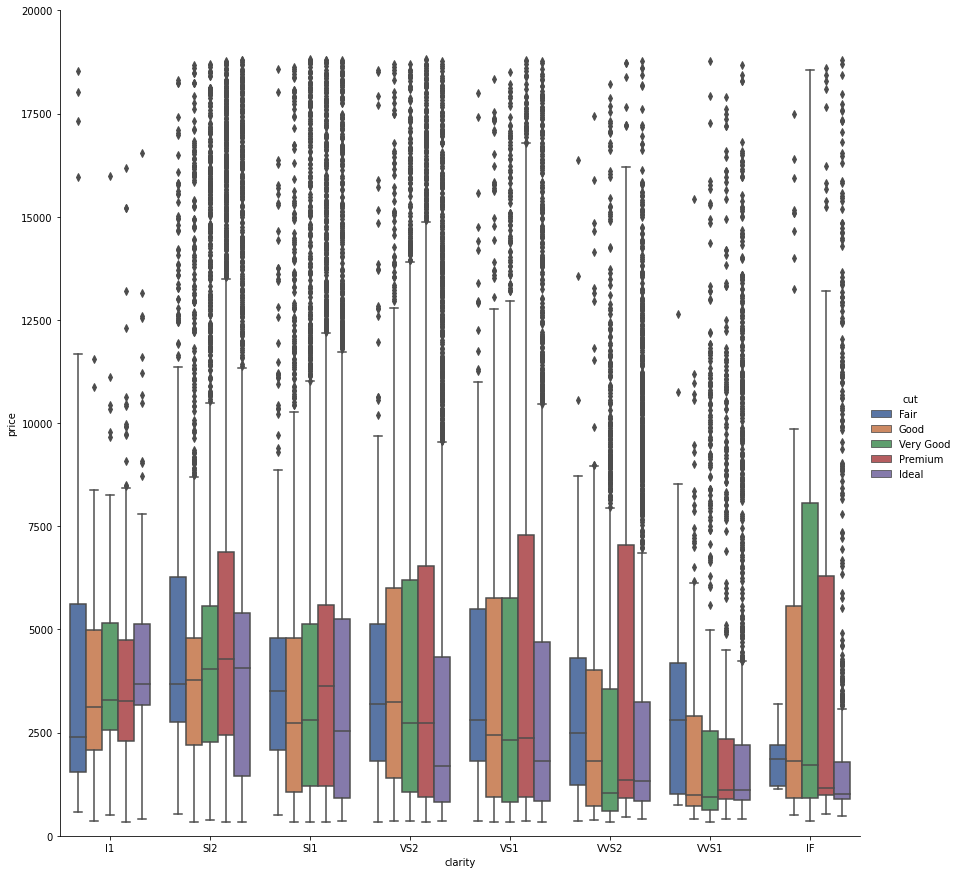

In [ ]:
sns.catplot(x="clarity", y="price", data=diamond_df, hue="cut", kind="box", height=12, 
            order=['I1','SI2','SI1', 'VS2','VS1', 'VVS2','VVS1', 'IF'],
            hue_order=['Fair', 'Good','Very Good', 'Premium','Ideal'], 
           palette="deep").set(ylim=(0,20000))

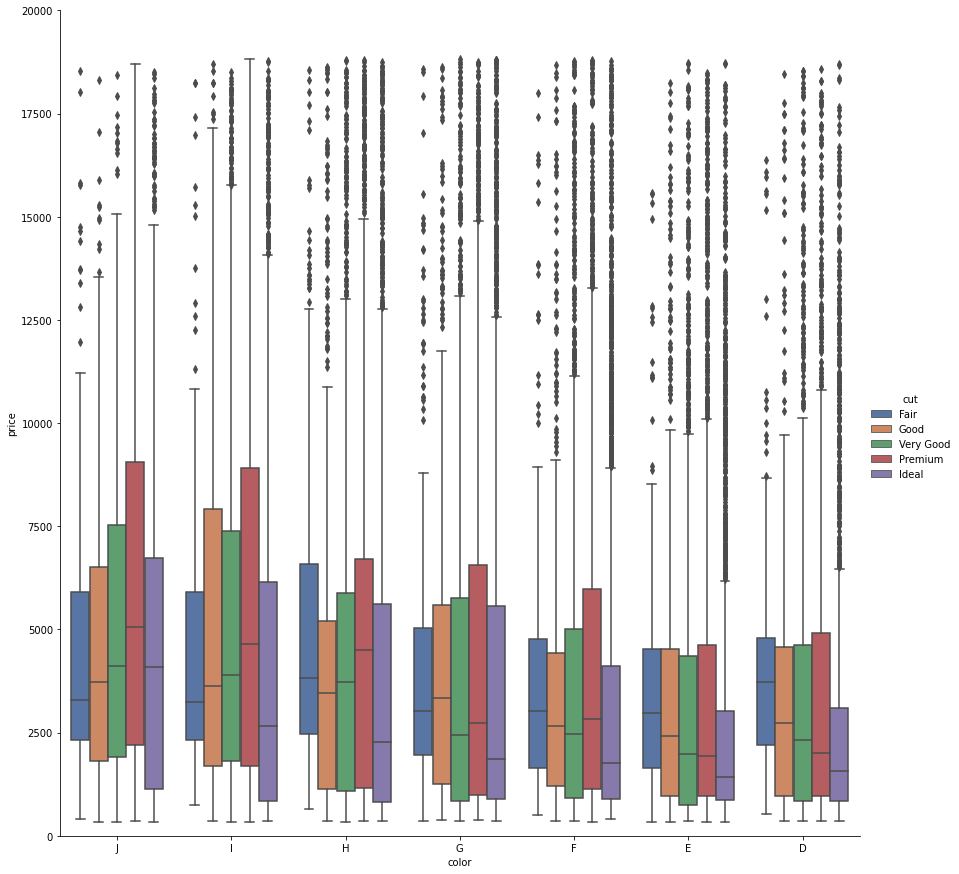

In [ ]:
sns.catplot(x="color", y="price", data=diamond_df, hue="cut", 
            kind="box", height=12, order='JIHGFED',
            hue_order=['Fair', 'Good','Very Good', 'Premium','Ideal'], 
           palette="deep").set(ylim=(0,20000))

# 6. Summary
*   According to the boxplots in the last section, the dataset still have some long tail appears to be outliers that could be trimmed in futher studies.
*   It is quite surprizing that depth and table size of the diamond does not seem to have an impact on prices.
*   The better the rate of color, cut or clarity, does not necessarily lead to a higher price.
*   If I were to buy a diamond, I could not care so much about the color, and choose something with a mid-level clarity and high level cut.
*   A model could be developed with this data set to have it trained to predict diamond price with any given carat, dimension, cut, color or clarity.